Các nhãn và số văn bản tương ứng trong dữ liệu
----------------------------------------------
doi-song: 120
du-lich: 54
giai-tri: 201
giao-duc: 105
khoa-hoc: 144
kinh-doanh: 262
phap-luat: 59
suc-khoe: 162
the-thao: 173
thoi-su: 59
-------------------------
Tổng số văn bản: 1339
mapping:
doi-song - 0
du-lich - 1
giai-tri - 2
giao-duc - 3
khoa-hoc - 4
kinh-doanh - 5
phap-luat - 6
suc-khoe - 7
the-thao - 8
thoi-su - 9
-----------Dữ liệu của bài viết đầu tiên-----------
tên file: ['data/news_vnexpress\\khoa-hoc\\00133.txt']
data_train: ['Mời độc giả đặt câu hỏi tại đây\n']
target: [4]

Tổng số  văn bản: 1339
Số lượng stopwords: 2063
['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']
Dữ liệu văn bản trước khi xử lý:
Mời độc giả đặt câu hỏi tại đây


Dữ liệu văn bản sau khi xử lý:
  (0, 12711)	0.47047455226652657
  (0, 7462)	0.6112865759350837
  (0, 4378)	0.44175809334129823
  (0, 3084)	0.4580744532481954

Số lượng từ trong từ điển: 12796
Kích thước dữ liệu s

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.65s/it]


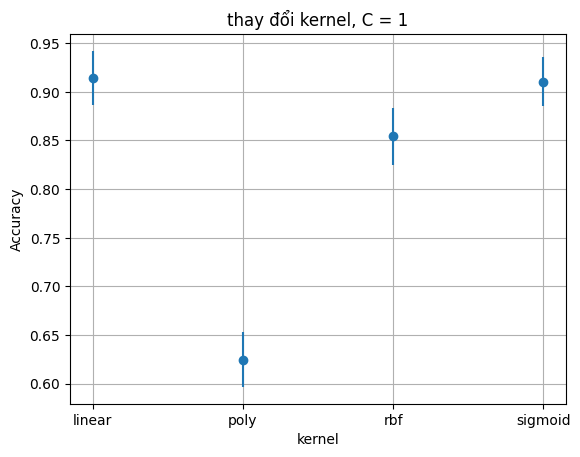

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


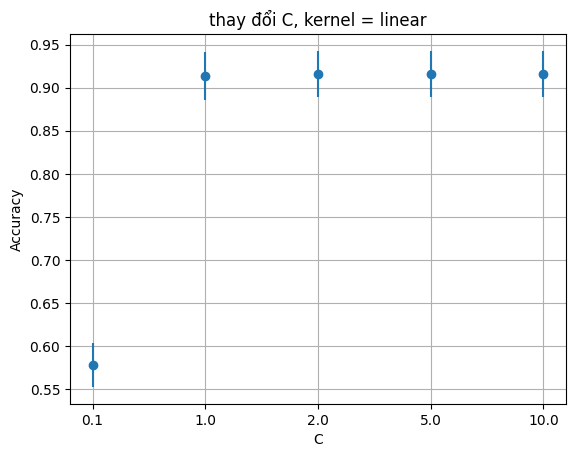

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.92s/it]


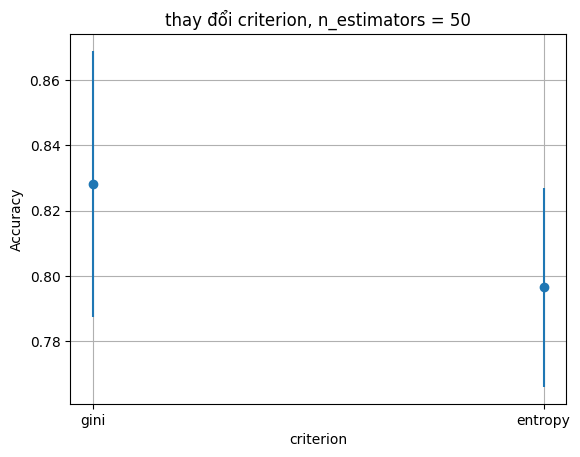

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:24<00:00,  6.01s/it]


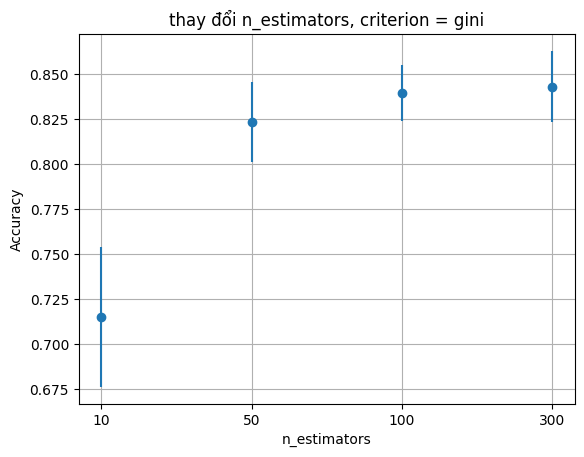

SVM: 0.9253731343283582
RF: 0.832089552238806
[7 8 5 4 1 0 7 4 8 2 4 4 8 0 5 2 0 5 8 7 5 7 8 5 5 4 8 0 4 4 2 2 0 0 5 4 8
 2 5 1 8 8 1 2 2 8 6 2 3 0 5 2 5 7 8 9 7 5 2 7 2 3 9 5 5 5 2 0 5 4 7 8 5 5
 9 4 2 7 8 8 5 5 7 8 2 7 7 0 0 2 5 5 8 0 1 8 5 2 2 4 5 2 3 1 9 6 5 8 6 7 0
 8 2 6 8 5 5 6 4 7 1 5 7 2 2 3 4 7 2 0 8 5 2 4 3 8 2 5 8 8 0 7 7 5 0 5 7 0
 5 7 9 7 7 5 4 2 8 5 4 5 5 6 0 3 1 0 8 4 2 3 2 6 2 7 3 5 2 8 8 2 4 2 6 5 5
 7 8 8 8 5 7 8 9 7 7 5 2 2 0 5 6 4 3 0 7 3 5 8 2 0 2 6 9 7 3 2 2 5 7 9 2 5
 4 8 5 4 7 1 2 5 4 4 5 5 9 3 6 8 5 5 9 8 0 5 3 5 7 0 5 0 5 4 5 2 4 4 5 5 4
 7 4 2 7 5 5 8 4 5]
[7 8 5 4 1 0 7 4 8 2 4 4 8 0 5 3 0 5 8 7 5 9 8 5 5 4 8 0 4 4 2 2 1 7 5 4 8
 2 5 1 8 8 1 2 1 8 6 2 2 0 5 2 5 0 8 9 7 5 2 7 2 3 9 5 5 6 2 0 5 4 7 8 5 5
 9 4 2 7 8 8 5 5 7 8 2 7 7 0 0 2 5 5 8 0 1 8 2 2 0 4 4 2 3 1 9 6 5 8 6 7 0
 8 1 6 8 5 5 6 4 7 1 5 7 2 2 3 4 7 2 0 8 5 2 4 3 8 2 5 8 8 0 7 2 5 0 5 7 0
 5 7 9 7 7 5 4 2 8 5 4 1 5 6 0 3 1 0 8 4 2 3 2 6 2 7 3 5 2 8 8 1 4 2 6 5 5
 7 8 8 8 5 7 8 9 7 7 5 2 2 0 5 6 4

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from tqdm import tqdm

from sklearn.datasets import load_files
from pyvi import ViTokenizer

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

INPUT = 'data/news_vnexpress'
os.makedirs("images",exist_ok=True)  # thư mục lưu các hình ảnh kết quả trong quá trình huấn luyện và đánh giá

# statistics
print('Các nhãn và số văn bản tương ứng trong dữ liệu')
print('----------------------------------------------')
n = 0
for label in os.listdir(INPUT):
    print(f'{label}: {len(os.listdir(os.path.join(INPUT, label)))}')  #duyet qua thu muc INPUT va in ten cac thu muc con va sl tep
    n += len(os.listdir(os.path.join(INPUT, label)))

print('-------------------------')
print(f"Tổng số văn bản: {n}")

# load data
data_train = load_files(container_path=INPUT, encoding="utf-8")

print('mapping:')
for i in range(len(data_train.target_names)):
    print(f'{data_train.target_names[i]} - {i}')

print('-----------Dữ liệu của bài viết đầu tiên-----------')
print('tên file:', data_train.filenames[0:1])
print('data_train:', data_train.data[0:1])
print('target:', data_train.target[0:1])

print("\nTổng số  văn bản: {}" .format( len(data_train.filenames)))

# load dữ liệu các stopwords 
with open("data/vietnamese-stopwords.txt", encoding="utf-8") as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]    #strip() sẽ loại bỏ khoảng trắng 2 phía và replace để thay thế khoảng trắng bằng dấu _
print(f"Số lượng stopwords: {len(stopwords)}")
print(stopwords[:10])

# Chuyển hoá dữ liệu text về dạng vector TF print(module_count_vector)
#     - loại bỏ từ dừng
#     - sinh từ điển
module_count_vector = CountVectorizer(stop_words=stopwords) #chỉnh định từ cần loại bỏ là cac stopword từ file vua doc
model_rf_preprocess = Pipeline([('vect', module_count_vector),('tf', TfidfTransformer()),]) #truyền vào các bước thực hiện tuần tự

# Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
# Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 
data_preprocessed = model_rf_preprocess.fit_transform(data_train.data, data_train.target)
# In ra một mẫu dữ liệu văn bản trước khi xử lý
print("Dữ liệu văn bản trước khi xử lý:")
print(data_train.data[0])

# In ra một mẫu dữ liệu văn bản sau khi xử lý
print("\nDữ liệu văn bản sau khi xử lý:")
print(data_preprocessed[0])

#0 là chỉ số của mẫu văn bản.
#12711 là chỉ số của từ trong từ điển. Mỗi từ trong từ điển sẽ được gán một chỉ số.
#0.47047455226652657 là giá trị TF-IDF của từ tương ứng (có chỉ số là 12711) trong mẫu văn bản đó.
#nó có nhiều từ mà chỉ còn vài dòng là do mốt số từ đã bị loại do có chỉ số TFIDF sap si bang 0

print(f"\nSố lượng từ trong từ điển: {len(module_count_vector.vocabulary_)}")
print(f"Kích thước dữ liệu sau khi xử lý: {data_preprocessed.shape}")
print(f"Kích thước nhãn tương ứng: {data_train.target.shape}")

#chia 
pivot = int(data_preprocessed.shape[0] * 0.8) # shape[0] la dong, 1 la cot, ma tran thua thì nó bo may cai cot co gia tri la 0 roi
print('pivot:',pivot)
X_train, X_test = data_preprocessed[0:pivot], data_preprocessed[pivot:]
print('X')
Y_train, Y_test = data_train.target[0:pivot], data_train.target[pivot:]

#Lựa chọn (tối ưu) tham số
def cross_validation(estimator): #tham số estimator là mô hình sẽ đưa vào
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

# Đánh giá hiệu quả của các kernel trong SVM
title = "thay đổi kernel, C = 1"
xlabel = "kernel"
X = []
Y = []
error = []

for kernel in tqdm(['linear', 'poly', 'rbf', 'sigmoid']):
    # Với mỗi kernel được chọn, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = svm.SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation(text_clf)
    X.append(kernel)
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh 
plot(title, xlabel, X, Y, error)
plt.savefig('images/svm_change_kernel.png', bbox_inches='tight')
plt.show()

#Đánh giá ảnh hưởng của tham số C trong SVM
title = "thay đổi C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    # Với từng giá trị C nhận được, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('images/svm_change_C.png', bbox_inches='tight')
plt.show()

#Đánh giá ảnh hưởng của độ đo trong Random Forest
title = "thay đổi criterion, n_estimators = 50"
xlabel = "criterion"
X = []
Y = []
error = []

for criterion in tqdm(["gini", "entropy"]):
    # Với mỗi criterion nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = RandomForestClassifier(criterion=criterion, n_estimators=50)
    mean, std = cross_validation(text_clf)
    X.append(str(criterion))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('images/RF_change_criterion.png', bbox_inches='tight')
plt.show()

#Đánh giá ảnh hưởng của số cây trong Random Forest
title = "thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    # Với từng giá trị n_estimators nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('images/RF_change_N.png', bbox_inches='tight')
plt.show()

svm_ = svm.SVC(kernel='linear', C=1.0)
rf = RandomForestClassifier(criterion='gini', n_estimators=100)

# Huấn luyện các mô hình trên tập dữ liệu train đầy đủ
svm_.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

# Kết quả dự đoán trên tập test
print(f'SVM: {accuracy_score(Y_test, svm_.predict(X_test))}')
print(f'RF: {accuracy_score(Y_test, rf.predict(X_test))}')